In [23]:
import numpy as np
from matplotlib import pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots


In [24]:
t = np.linspace(0, 1, 11)
x = np.linspace(0, 1, 11)
print(t)

p = 5

n_t, n_x = len(t), len(x)


def trd(a, b, c, n):
    A = np.zeros((n, n))
    for i in range(n):
        if i == 0:
            A[i][i] = b
            A[i][i+1] = c
        elif i == n-1:
            A[i][i-1] = a
            A[i][i] = b
        else:
            A[i][i-1] = a
            A[i][i] = b
            A[i][i+1] = c
    return A

def bw_euler(x, t, a = 0.024):
    dx, dt = 1/(len(x)-1), 1/(len(t)-1)
    
    u0 = 2*(x**4) - 2*np.exp(x)
    b1 = -3*(t**3) - 2
    b2  = 2 - 3*(t**3) + 3*(t**2) - 2*np.exp(1)

    
    td = trd(1,-2, 1, n_t)
    td = np.eye(n_t) - ((a*dt)/(dx**2) * td) 
    u_ = np.zeros((n_t, n_x))
    v  = np.zeros(n_t) 
    u_[0] = u0
    for i in range(n_t):
        u_[i][0], u_[i][-1] = b1[i], b2[i]

    for i in range(1, n_t):
        v = (dt * f(x, np.array([t[i]for k in range((n_t))]))) + u_[i-1]

        q = np.linalg.solve(td,v)
        u_[i][1:-1] = q[1:-1]
    
    return u_
    
    


def U(t, x = p/10):
    return 2 * (x**4) - 3 * (t**3) + 3*(t**2)*x - 2*np.exp(x)

def f(x, t, a = 0.024): 
    return -9 * (t**2) + 6*t*x - a*(24*(x**2) - 2*np.exp(x))



[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


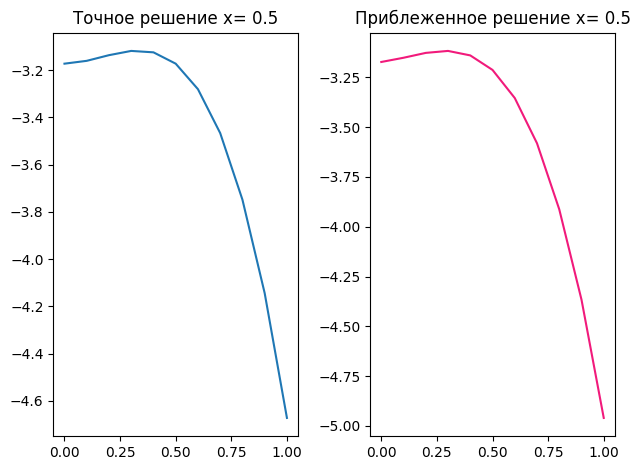

In [25]:
fig, axs = plt.subplots(ncols = 2, nrows = 1)

X, Y = np.meshgrid(t, x)
y1 = bw_euler(x,t)



z = [y1[i][p] for i in range(n_t)]
axs[0].plot(t, U(t))
axs[0].set_title(f"Точное решение x= 0.{p}")

axs[1].plot(t, z, "#F11A7B")
axs[1].set_title(f"Приблеженное решение x= 0.{p}")
#axs[1].plot_surface(x, t, bw_euler(x,t))

fig.tight_layout()
plt.show()


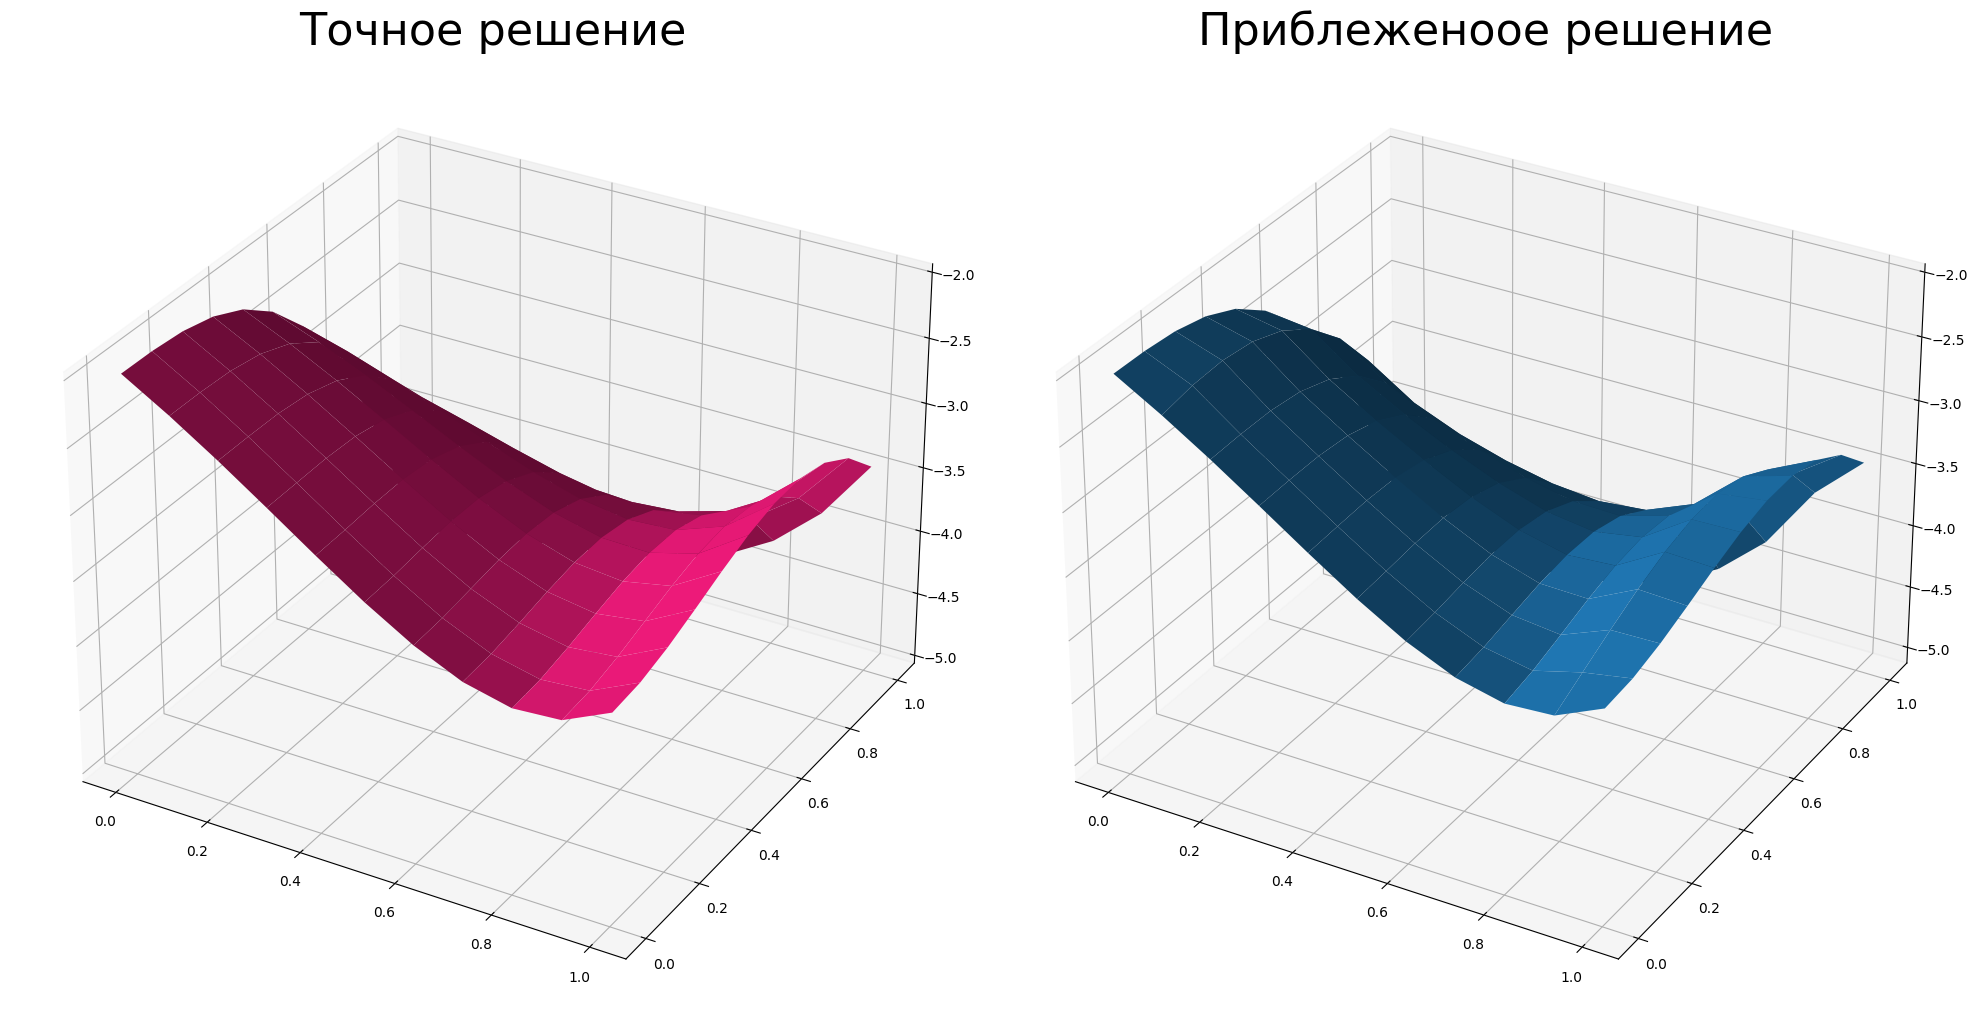

In [26]:
fig, axs = plt.subplots(ncols = 2, nrows = 1, subplot_kw={"projection": "3d"})
fig.set_figheight(20)
fig.set_figwidth(20)




axs[0].plot_surface(X, Y, U(Y, X), color="#F11A7B")
axs[0].set_title("Точное решение", fontsize = 32)

axs[1].plot_surface(X, Y, y1)
axs[1].set_title("Приблеженоое решение", fontsize = 32)

fig.savefig("fig.png")
fig.tight_layout()
plt.show()

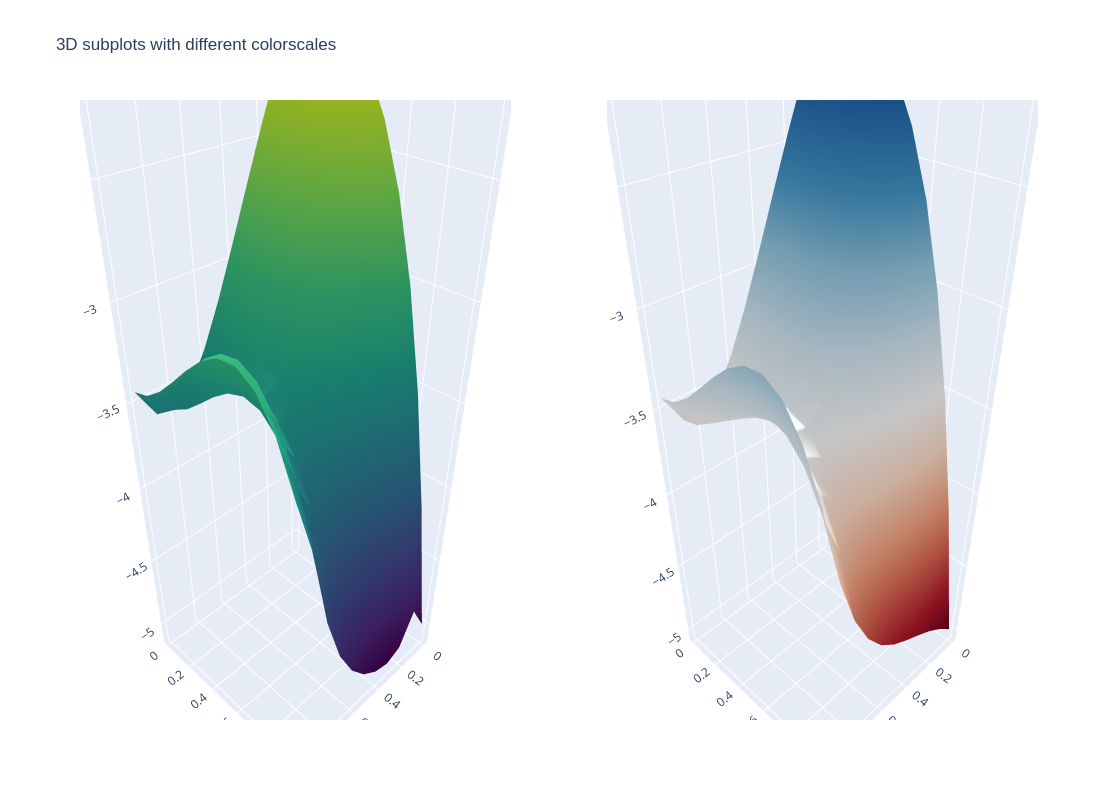

In [37]:
X, Y = np.meshgrid(x, t)
y1 = bw_euler(x,t)

fig = make_subplots(
    rows=1, cols=2,
    specs=[[{'type': 'surface'}, {'type': 'surface'}]])

fig.add_trace(
    go.Surface(x=X, y=Y, z=y1, colorscale='Viridis', showscale=False),
    row=1, col=1)

fig.add_trace(
    go.Surface(x=X, y=Y, z=U(Y,X), colorscale='RdBu', showscale=False),
    row=1, col=2)



fig.update_layout(
    title_text='3D subplots with different colorscales',
    height=800,
    width=800
)

fig.show()